# Construccion del modelo predictivo. Random Forest

In [43]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import warnings
import numpy as np
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier


# check version number
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [44]:
workdir="/home/juanfi/Documentos/diplo_utn/DesafioAgTech2020-master/data/segundo intento/"
df_train = pd.read_csv(workdir+'datos_campañas_train_reducido_final.csv')
df_test  = pd.read_csv(workdir+'indices_test_reducido.csv', sep= '\t')

# Preparacion TRAIN

In [45]:
df_train.columns

Index(['Unnamed: 0', 'cultivo', 'camp', 'ARI_t1', 'ARVI_t1', 'CHL-RED-EDGE_t1',
       'GNDVI_t1', 'MCARI_t1', 'MSI_t1', 'NBR_t1', 'NDII_t1', 'NDVI_t1',
       'NDWI_t1', 'PSSR_t1', 'SAVI_t1', 'ARI_t2', 'ARVI_t2', 'CHL-RED-EDGE_t2',
       'GNDVI_t2', 'MCARI_t2', 'MSI_t2', 'NBR_t2', 'NDII_t2', 'NDVI_t2',
       'NDWI_t2', 'PSSR_t2', 'SAVI_t2', 'ARI_t3', 'ARVI_t3', 'CHL-RED-EDGE_t3',
       'GNDVI_t3', 'MCARI_t3', 'MSI_t3', 'NBR_t3', 'NDII_t3', 'NDVI_t3',
       'NDWI_t3', 'PSSR_t3', 'SAVI_t3', 'ARI_t4', 'ARVI_t4', 'CHL-RED-EDGE_t4',
       'GNDVI_t4', 'MCARI_t4', 'MSI_t4', 'NBR_t4', 'NDII_t4', 'NDVI_t4',
       'NDWI_t4', 'PSSR_t4', 'SAVI_t4', 'ARI_t5', 'ARVI_t5', 'CHL-RED-EDGE_t5',
       'GNDVI_t5', 'MCARI_t5', 'MSI_t5', 'NBR_t5', 'NDII_t5', 'NDVI_t5',
       'NDWI_t5', 'PSSR_t5', 'SAVI_t5', 'ARI_t6', 'ARVI_t6', 'CHL-RED-EDGE_t6',
       'GNDVI_t6', 'MCARI_t6', 'MSI_t6', 'NBR_t6', 'NDII_t6', 'NDVI_t6',
       'NDWI_t6', 'PSSR_t6', 'SAVI_t6'],
      dtype='object')

In [51]:
# Label enconder a los tags para cada cultivo para poder incorporar al modelo

from sklearn.preprocessing import LabelEncoder

y=df_train['cultivo']

le = preprocessing.LabelEncoder()

y= le.fit_transform(y)

df_y = pd.DataFrame(y, columns = ['label'])

In [54]:

### Construimos un diccionario de los labels para poder hacer maping con las predicciones
### que nos devuelva en modelo y saber a que cultivo corresponden

mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping

{'A': 0,
 'B': 1,
 'G': 2,
 'M': 3,
 'N': 4,
 'P': 5,
 'R': 6,
 'S': 7,
 'S/M': 8,
 'T': 9,
 'U': 10,
 'X': 11,
 'aa': 12,
 'm': 13,
 's': 14}

In [5]:
colstoexclude = ['Unnamed: 0', 'lat', 'lon', 'px', 'py', 'cultivo', 'camp']

X =df_train[[col for col in df_train.columns if col not in colstoexclude]]

### Escalado

In [6]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_scaled =pd.DataFrame(X_scaled) 

X_scaled.columns = X.columns

### Split en train test

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,y, test_size= 0.25)

### Evaluar desbalance de clases, probar hacer un balance un poco más equitativo

In [8]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

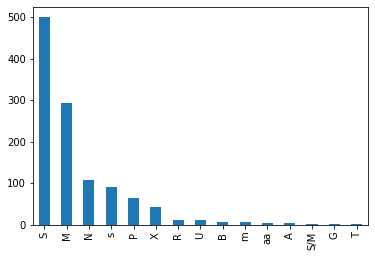

In [9]:
clases = df_train['cultivo'].value_counts()
clases.plot(kind = 'bar')

In [10]:
from collections import Counter

target = df_y['label']
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))


Class=7, Count=499, Percentage=43.619%
Class=3, Count=292, Percentage=25.524%
Class=4, Count=107, Percentage=9.353%
Class=0, Count=3, Percentage=0.262%
Class=5, Count=65, Percentage=5.682%
Class=6, Count=12, Percentage=1.049%
Class=12, Count=4, Percentage=0.350%
Class=11, Count=43, Percentage=3.759%
Class=8, Count=2, Percentage=0.175%
Class=14, Count=90, Percentage=7.867%
Class=2, Count=2, Percentage=0.175%
Class=13, Count=5, Percentage=0.437%
Class=10, Count=12, Percentage=1.049%
Class=1, Count=6, Percentage=0.524%
Class=9, Count=2, Percentage=0.175%


### RANDOM OVER SAMPLING 

In [11]:
strategy = {0:15, 1:15, 2:15, 6:15,8:15,9:15,10:15,12:15,13:15}
oversample = RandomOverSampler(sampling_strategy=strategy)

In [12]:
X_over, y_over = oversample.fit_resample(xtrain, ytrain)

### EVALUACION DE MODELOS

In [13]:

def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [14]:
# Modelos a probar

def get_models():
    models, names = list(), list()
    # SVM
    models.append(SVC(gamma='auto'))
    names.append('SVM')
    # KNN
    models.append(KNeighborsClassifier())
    names.append('KNN')
    # Bagging
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    return models, names

>SVM 0.922 (0.018)
>KNN 0.903 (0.014)
>BAG 0.948 (0.013)
>RF 0.959 (0.010)
>ET 0.959 (0.010)


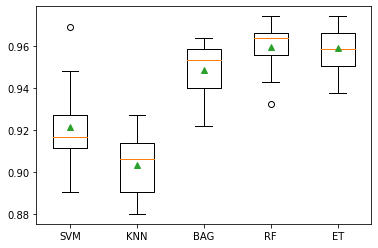

In [15]:
# definir modelos
models, names = get_models()
results = list()

# evaluar cada modelo

for i in range(len(models)):   
    # evaluar el modelo y almacenar los resultados
    scores = evaluate_model(X_over, y_over, models[i])
    results.append(scores)
    #Rendimiento
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Seleciono RF por mejor scoring

### Random forest



In [16]:
class Create_ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
        self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, 
                                     random_state = random_state).split(X, y))

        train_pred = np.zeros((X.shape[0], len(self.base_models)))
        test_pred = np.zeros((T.shape[0], len(self.base_models)* self.n_splits))
        f1_scores = np.zeros((len(self.base_models), self.n_splits))
        recall_scores = np.zeros((len(self.base_models), self.n_splits))
        
        test_col = 0
        for i, clf in enumerate(self.base_models):
            
            for j, (train_idx, valid_idx) in enumerate(folds):
                
                X_train = X[train_idx]
                Y_train = y[train_idx]
                X_valid = X[valid_idx]
                Y_valid = y[valid_idx]
                
                clf.fit(X_train, Y_train)
                
                valid_pred = clf.predict(X_valid)
                recall  = recall_score(Y_valid, valid_pred, average='macro')
                f1 = f1_score(Y_valid, valid_pred, average='macro')
                
                recall_scores[i][j] = recall
                f1_scores[i][j] = f1
                
                train_pred[valid_idx, i] = valid_pred
                test_pred[:, test_col] = clf.predict(T)
                test_col += 1
                
                print( "Model- {} and CV- {} recall: {}, f1_score: {}".format(i, j, recall, f1))
            
        return train_pred, test_pred, recall_scores, f1_scores

In [17]:
random_state= 2018

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = random_state)

rdf = RandomForestClassifier(random_state = random_state) 
scoring = {'Recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)
          }

params = {'max_depth': [6, 8, 10, 20], 
              'min_samples_split': [5, 10, 15],
              'min_samples_leaf' : [4, 8, 12],
              'n_estimators' : [300, 400, 500]
             }

grid_clf = GridSearchCV(estimator = rdf, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_clf.fit(X_over, y_over)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             estimator=RandomForestClassifier(random_state=2018), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 20],
                         'min_samples_leaf': [4, 8, 12],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [300, 400, 500]},
             verbose=4)

In [19]:
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=300, random_state=2018)
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}


In [20]:

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [21]:
class_weight = dict({0:25,1:25, 2:25, 3:1.8, 4:5,5:7,6:25,7:1,8:25,9:25,10:25,11:12,12:25,13:25,14:6})
# define the reference model

model = RandomForestClassifier(bootstrap=True, class_weight=class_weight, criterion='gini',
              max_depth=20, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=5,min_weight_fraction_leaf=0.0, 
              n_estimators=300, n_jobs=-1,oob_score=True,random_state=random_state,verbose=0, warm_start=False)
                
                
# evaluate the model
scores = evaluate_model(X_over, y_over, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.958 (0.009)


In [22]:
model.fit(X_over, y_over)

RandomForestClassifier(class_weight={0: 25, 1: 25, 2: 25, 3: 1.8, 4: 5, 5: 7,
                                     6: 25, 7: 1, 8: 25, 9: 25, 10: 25, 11: 12,
                                     12: 25, 13: 25, 14: 6},
                       max_depth=20, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=2018)

In [23]:
preds=model.predict(xtest)
y_preds = model.predict_proba(xtest)

In [24]:
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

In [25]:
print(classification_report(ytest,preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.99      1.00      0.99        68
           4       0.82      0.96      0.88        24
           5       0.94      0.81      0.87        21
           6       1.00      1.00      1.00         2
           7       0.98      1.00      0.99       127
           9       0.00      0.00      0.00         1
          10       1.00      0.83      0.91         6
          11       0.88      0.88      0.88         8
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         3
          14       0.96      0.96      0.96        23

    accuracy                           0.96       286
   macro avg       0.81      0.80      0.81       286
weighted avg       0.95      0.96      0.95       286



/home/juanfi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print("Accuracy:",metrics.accuracy_score(ytest, preds))

Accuracy: 0.958041958041958


In [27]:
from sklearn import preprocessing

In [28]:
#Binarize the output
y_test_bin = preprocessing.label_binarize(ytest, classes=[0,1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14])
n_classes = y_test_bin.shape[1]

/home/juanfi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/home/juanfi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


AUC for Class 1: nan
AUC for Class 2: 1.0
AUC for Class 3: 1.0
AUC for Class 4: 1.0
AUC for Class 5: 0.9939567430025446
AUC for Class 6: 0.9965858041329739
AUC for Class 7: 1.0
AUC for Class 8: 0.9995047788837716
AUC for Class 9: nan
AUC for Class 10: 0.4614035087719298
AUC for Class 11: 1.0
AUC for Class 12: 0.9964028776978417
AUC for Class 13: 1.0
AUC for Class 14: 0.983510011778563
AUC for Class 15: 0.9995040502562407


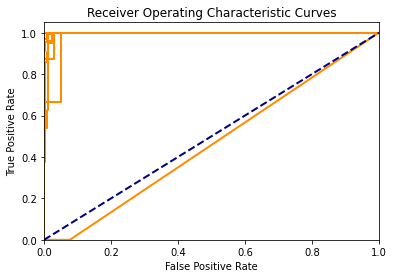

In [29]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_preds[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

### Preparacion TEST

In [30]:
df_test

,Unnamed: 0,Unnamed: 0.1,lat,lon,px,py,cultivo,camp,ARI_t1,ARVI_t1,...,MSI_t6,NBR_t6,NDII_t6,NDVI_t6,NDWI_t6,PSSR_t6,SAVI_t6,Id,Elevacion,GlobalId
0,0,0,-33.797816,-62.150971,2704,1468,NaN,18/19,0.000152,4.338816,...,0.617794,0.532992,0.236251,0.608765,-0.529114,4.112012,0.912992,2,104.111862,2
1,1,1,-33.804243,-62.148934,2712,1492,NaN,18/19,0.000185,2.442672,...,0.727855,0.375918,0.157505,0.408327,-0.391324,2.380245,0.612420,3,105.698082,3
2,2,2,-33.812363,-62.163801,2656,1522,NaN,18/19,0.000242,2.883789,...,0.628532,0.451164,0.228100,0.635908,-0.565366,4.493110,0.953733,5,104.233162,5
3,3,3,-33.810439,-62.169497,2635,1515,NaN,18/19,0.000245,2.972905,...,0.631846,0.553731,0.225606,0.654689,-0.566830,4.791886,0.981917,8,103.859932,8
4,4,4,-33.786731,-62.114892,2838,1427,NaN,18/19,0.000157,4.887607,...,0.676384,0.395842,0.193044,0.298016,-0.283043,1.849067,0.446981,11,101.769859,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,550,550,-33.677379,-61.533782,4994,1021,NaN,19/20,0.000680,1.419455,...,0.546840,0.473264,0.292958,0.446032,-0.402104,2.610319,0.669002,456,92.649977,1438
551,551,551,-34.182192,-62.025248,3171,2895,NaN,19/20,0.000572,1.446583,...,0.680122,0.334896,0.190390,0.348646,-0.330032,2.070529,0.522927,461,-0.000023,1443
552,552,552,-34.006756,-61.607729,4720,2244,NaN,19/20,0.000861,1.721701,...,0.584194,0.388165,0.262472,0.404148,-0.355961,2.356540,0.606174,463,-0.000023,1445
553,553,553,-33.739404,-61.972923,3365,1252,NaN,19/20,0.000014,0.990485,...,0.927107,0.090399,0.037825,0.109089,-0.126090,1.244893,0.163620,468,-0.000023,1450


In [31]:
df_test.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'lat', 'lon', 'px', 'py', 'cultivo',
       'camp', 'ARI_t1', 'ARVI_t1', 'CHL-RED-EDGE_t1', 'GNDVI_t1', 'MCARI_t1',
       'MSI_t1', 'NBR_t1', 'NDII_t1', 'NDVI_t1', 'NDWI_t1', 'PSSR_t1',
       'SAVI_t1', 'ARI_t2', 'ARVI_t2', 'CHL-RED-EDGE_t2', 'GNDVI_t2',
       'MCARI_t2', 'MSI_t2', 'NBR_t2', 'NDII_t2', 'NDVI_t2', 'NDWI_t2',
       'PSSR_t2', 'SAVI_t2', 'ARI_t3', 'ARVI_t3', 'CHL-RED-EDGE_t3',
       'GNDVI_t3', 'MCARI_t3', 'MSI_t3', 'NBR_t3', 'NDII_t3', 'NDVI_t3',
       'NDWI_t3', 'PSSR_t3', 'SAVI_t3', 'ARI_t4', 'ARVI_t4', 'CHL-RED-EDGE_t4',
       'GNDVI_t4', 'MCARI_t4', 'MSI_t4', 'NBR_t4', 'NDII_t4', 'NDVI_t4',
       'NDWI_t4', 'PSSR_t4', 'SAVI_t4', 'ARI_t5', 'ARVI_t5', 'CHL-RED-EDGE_t5',
       'GNDVI_t5', 'MCARI_t5', 'MSI_t5', 'NBR_t5', 'NDII_t5', 'NDVI_t5',
       'NDWI_t5', 'PSSR_t5', 'SAVI_t5', 'ARI_t6', 'ARVI_t6', 'CHL-RED-EDGE_t6',
       'GNDVI_t6', 'MCARI_t6', 'MSI_t6', 'NBR_t6', 'NDII_t6', 'NDVI_t6',
       'NDWI_t6', 'PSSR_t6', 'SAV

In [32]:
colstoexclude = ['Unnamed: 0','Unnamed: 0.1', 'lat', 'lon', 'px', 'py', 'cultivo', 'camp', 'Id', 'Elevacion', 'GlobalId']

X_test =df_test[[col for col in df_test.columns if col not in colstoexclude]]

In [83]:
X_test

,ARI_t1,ARVI_t1,CHL-RED-EDGE_t1,GNDVI_t1,MCARI_t1,MSI_t1,NBR_t1,NDII_t1,NDVI_t1,NDWI_t1,...,CHL-RED-EDGE_t6,GNDVI_t6,MCARI_t6,MSI_t6,NBR_t6,NDII_t6,NDVI_t6,NDWI_t6,PSSR_t6,SAVI_t6
0,0.000152,4.338816,5.934317e-07,0.265324,184.519756,1.540911,-0.015753,-0.212881,0.281796,-0.265324,...,5.292766e-07,0.529114,258.064641,0.617794,0.532992,0.236251,0.608765,-0.529114,4.112012,0.912992
1,0.000185,2.442672,2.905603e-07,0.228792,97.579186,1.434256,0.007376,-0.178394,0.149215,-0.228792,...,2.047866e-07,0.391324,268.301095,0.727855,0.375918,0.157505,0.408327,-0.391324,2.380245,0.612420
2,0.000242,2.883789,3.454897e-07,0.423868,274.343019,0.983688,0.263032,0.008223,0.413886,-0.423868,...,3.537155e-07,0.565366,279.646867,0.628532,0.451164,0.228100,0.635908,-0.565366,4.493110,0.953733
3,0.000245,2.972905,2.710984e-07,0.361499,298.883616,1.093302,0.202930,-0.044572,0.321290,-0.361499,...,2.364145e-07,0.566830,662.650424,0.631846,0.553731,0.225606,0.654689,-0.566830,4.791886,0.981917
4,0.000157,4.887607,6.462192e-07,0.225332,243.411926,0.854199,0.316090,0.078633,0.265453,-0.225332,...,1.319091e-07,0.283043,340.259380,0.676384,0.395842,0.193044,0.298016,-0.283043,1.849067,0.446981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0.000680,1.419455,3.196868e-07,0.669318,1715.662141,0.633201,0.457513,0.224589,0.783034,-0.669318,...,7.800855e-08,0.402104,645.357811,0.546840,0.473264,0.292958,0.446032,-0.402104,2.610319,0.669002
551,0.000572,1.446583,5.508695e-07,0.529728,444.012060,0.963892,0.189028,0.018386,0.539174,-0.529728,...,1.016777e-07,0.330032,436.016421,0.680122,0.334896,0.190390,0.348646,-0.330032,2.070529,0.522927
552,0.000861,1.721701,6.421484e-07,0.652349,807.399729,0.610841,0.441327,0.241588,0.719285,-0.652349,...,9.457670e-08,0.355961,752.628281,0.584194,0.388165,0.262472,0.404148,-0.355961,2.356540,0.606174
553,0.000014,0.990485,1.880815e-07,0.105877,-76.044788,1.059789,0.028330,-0.029027,0.076114,-0.105877,...,9.417794e-08,0.126090,82.978385,0.927107,0.090399,0.037825,0.109089,-0.126090,1.244893,0.163620


### Escalado

In [84]:
scaler = RobustScaler()
X_test_scaled = scaler.fit_transform(X_test)

X_test_scaled =pd.DataFrame(X_test_scaled) 

X_test_scaled.columns = X_test.columns

In [85]:
X_test_scaled

,ARI_t1,ARVI_t1,CHL-RED-EDGE_t1,GNDVI_t1,MCARI_t1,MSI_t1,NBR_t1,NDII_t1,NDVI_t1,NDWI_t1,...,CHL-RED-EDGE_t6,GNDVI_t6,MCARI_t6,MSI_t6,NBR_t6,NDII_t6,NDVI_t6,NDWI_t6,PSSR_t6,SAVI_t6
0,-0.761794,2.042529,0.841697,-0.439576,-0.041760,0.060303,0.112665,-0.055921,0.087810,0.439576,...,2.982053,0.134392,-1.095916,0.374948,0.093231,-0.367216,0.218482,-0.134392,0.215592,0.218248
1,-0.643734,0.507553,-0.655408,-0.647946,-0.404078,-0.147956,0.214989,0.143215,-0.640418,0.647946,...,0.342247,-0.504599,-1.061637,0.888197,-0.616981,-0.814471,-0.544988,0.504599,-0.355598,-0.545111
2,-0.439880,0.864648,-0.383889,0.464723,0.332572,-1.027764,1.346028,1.220790,0.813340,-0.464723,...,1.553820,0.302509,-1.023644,0.425024,-0.276753,-0.413514,0.321870,-0.302509,0.341290,0.321718
3,-0.427910,0.936789,-0.751609,0.108988,0.434843,-0.813724,1.080132,0.915939,0.304738,-0.108988,...,0.599547,0.309297,0.258919,0.440476,0.187003,-0.427678,0.393411,-0.309297,0.439835,0.393297
4,-0.744283,2.486788,1.102627,-0.667678,0.203669,-1.280612,1.580760,1.627356,-0.001959,0.667678,...,-0.250630,-1.006747,-0.820671,0.648172,-0.526895,-0.612619,-0.965165,1.006747,-0.530797,-0.965273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,1.123179,-0.320767,-0.511434,1.864718,6.339161,-1.712146,2.206427,2.470144,2.840950,-1.864718,...,-0.689124,-0.454610,0.201012,0.044068,-0.176828,-0.045139,-0.401368,0.454610,-0.279713,-0.401410
551,0.738938,-0.298806,0.631310,1.068524,1.039655,-1.066419,1.018629,1.279474,1.501506,-1.068524,...,-0.496570,-0.788838,-0.500009,0.665603,-0.802461,-0.627694,-0.772312,0.788838,-0.457752,-0.772394
552,1.769957,-0.076091,1.082505,1.767927,2.554046,-1.755808,2.134815,2.568298,2.490799,-1.767927,...,-0.554338,-0.668594,0.560228,0.218260,-0.561606,-0.218293,-0.560905,0.668594,-0.363417,-0.560974
553,-1.252806,-0.668029,-1.161964,-1.349022,-1.127643,-0.879164,0.307691,1.005700,-1.041936,1.349022,...,-0.557582,-1.734601,-1.682227,1.817373,-1.907963,-1.494211,-1.684792,1.734601,-0.730072,-1.684920


In [86]:
predictions = model.predict(X_test_scaled)

In [87]:
predictions.size

555

In [88]:
# Invierto el dict para poder mapear los valores del array

inv_map = {v: k for k, v in mapping.items()}

In [89]:
inv_map

{0: 'A',
 1: 'B',
 2: 'G',
 3: 'M',
 4: 'N',
 5: 'P',
 6: 'R',
 7: 'S',
 8: 'S/M',
 9: 'T',
 10: 'U',
 11: 'X',
 12: 'aa',
 13: 'm',
 14: 's'}

In [90]:
pred_final = np.array([inv_map[x] for x in predictions])
pred_final

array(['M', 'M', 'S', 'N', 'N', 'M', 'S', 'S', 'S', 'P', 'S', 'P', 'S',
       'S', 'M', 'S', 'S', 'S', 'S', 'N', 'N', 'N', 'S', 'S', 'N', 'N',
       'N', 'S', 'S', 'S', 'S', 'S', 'N', 'S', 'M', 'M', 'S', 'S', 'S',
       'N', 'S', 'N', 'S', 'S', 'N', 'S', 'N', 'S', 'S/M', 'S', 'M', 'M',
       'N', 'M', 'S', 'M', 'S', 'S', 'S', 'S', 'M', 'S', 'M', 'S', 'S',
       'S', 'S', 'S', 'M', 'M', 'M', 'S', 'N', 'S', 'M', 'M', 'M', 'M',
       'P', 'N', 'P', 'S', 'S', 'S', 'S', 'M', 'M', 'N', 'M', 'M', 'M',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'M', 'S', 'S', 'M', 'S', 'X', 'S', 'M', 'S', 'S', 'S', 'S',
       'M', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'N', 'S', 'S', 'S',
       'S', 'S', 'M', 'S', 'S', 'S', 'S', 'M', 'M', 'S', 'M', 'M', 'M',
       'N', 'S', 'M', 'M', 'M', 'S', 'S', 'P', 'S', 'M', 'M', 'S', 'S',
       'S', 'S', 'S', 'M', 'M', 'S', 'S', 'S', 'S', 'M', 'M', 'M', 'M',
       'M', 'S', 'S', 'S', 'S', 'N', 'S', 'S', 'S', 'N', 'S', 

In [91]:
global_Id.size

555

In [92]:
global_Id= df_test['GlobalId'].values
global_Id

array([   2,    3,    5,    8,   11,   12,   13,   16,   17,   18,   19,
         20,   21,   22,   24,   29,   31,   32,   35,   36,   37,   40,
         47,   48,   50,   51,   53,   56,   58,   59,   63,   67,   68,
         84,   87,   90,   91,   95,   96,   97,   98,   99,  103,  107,
        111,  114,  116,  122,  124,  125,  127,  131,  133,  135,  137,
        138,  139,  141,  142,  145,  146,  147,  148,  152,  154,  155,
        156,  157,  158,  160,  161,  162,  167,  171,  178,  180,  182,
        184,  190,  192,  193,  194,  204,  206,  208,  210,  211,  216,
        218,  223,  225,  240,  241,  243,  244,  245,  247,  248,  250,
        252,  253,  254,  255,  257,  264,  269,  270,  272,  273,  275,
        277,  279,  280,  282,  283,  288,  289,  290,  291,  294,  296,
        299,  300,  302,  304,  305,  307,  311,  312,  313,  314,  315,
        317,  319,  320,  324,  325,  326,  332,  334,  339,  341,  343,
        344,  351,  352,  354,  359,  363,  365,  3

In [93]:
fin= np.column_stack((global_Id, pred_final))

In [94]:
fin

array([['2', 'M'],
       ['3', 'M'],
       ['5', 'S'],
       ...,
       ['1445', 'N'],
       ['1450', 'A'],
       ['1454', 'N']], dtype='<U21')

# Exportar archivo final 

In [249]:
np.savetxt('2darray.csv', fin, delimiter=',', fmt='%d')

In [247]:
fin.tofile('predss.csv', sep=',')